# Реализация алгоритма по оценке уровня модуляции с помощью распределения действительной или мнимой части QAM сигнала

Установка билиотек и подключение модулей:

In [ ]:
! pip install ModulationPy
! pip install scikit-commpy

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ModulationPy as mpy
import seaborn as sns
from commpy.channels import awgn

## Идея алгоритма
Заключается в том, что в QAM сигналах значения действительной и мнимой составляющей имеют дискретные значения (при условии отсуствия влияние шума).

И данные значения можно увидеть в виде пиков на диаграмме распределения.

Если разрабоать алгоритм, который позволит автоматически считать количество пиков в каждой четверти сигнала, то это поможет определить уровень модуляции, так как прослеживается следующая закономерность:

- 1 пик - QAM4;
- 2 пика - QAM 16;
- 4 пика - QAM64;
- 8 пиков - QAM256;
- 16 пиков - QAM1024;

Продемонстрируем на примере QAM64:

In [3]:
M = 64
N = 4096
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Нормировка
QAM = QAM/max(abs(QAM))

Разобъем значения по четвертям

In [4]:
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
quarter_2 = np.array([i for i in QAM if i.real <= 0 and i.imag >= 0])
quarter_3 = np.array([i for i in QAM if i.real <= 0 and i.imag <= 0])
quarter_4 = np.array([i for i in QAM if i.real >= 0 and i.imag <= 0])

Далее выведем гистограммы распределения значений каждой из четвертей

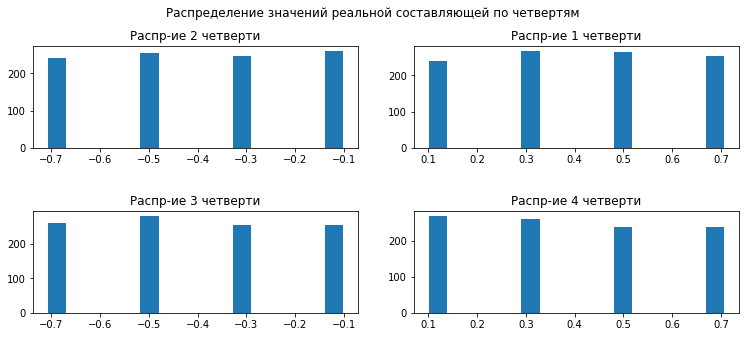

In [5]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений реальной составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.real, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.real, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.real, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.real, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

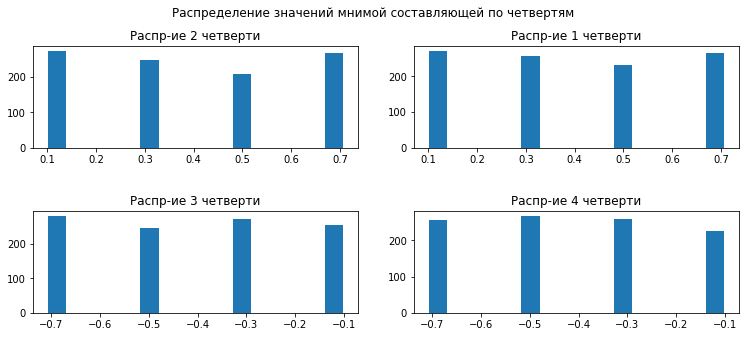

In [6]:
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений мнимой составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.imag, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.imag, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.imag, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.imag, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

Построим диаграмму созвездия QAM64 сигнала для проверки

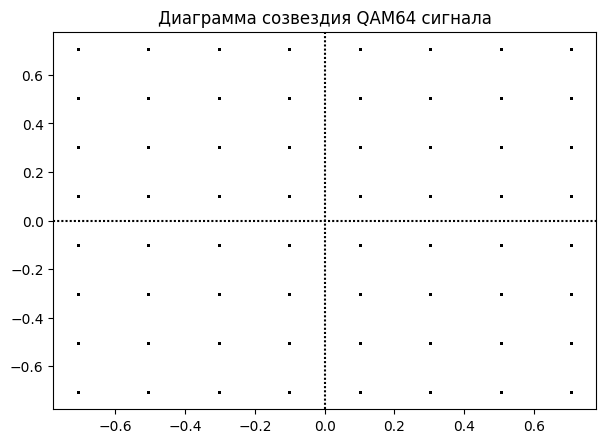

In [7]:
plt.figure(figsize=(7, 5), dpi=100)
plt.title(f"Диаграмма созвездия QAM{M} сигнала")
plt.scatter(QAM.real, 
            QAM.imag,
            c='black',
            marker='.',
            s=1)
plt.axhline(0, c='black', dashes=(1, 1))
plt.axvline(0, c='black', dashes=(1, 1))
plt.show()

Как мы видим количество пиков соответствует количеству точек на диаграмме созвездия QAM сигнала, для примера повторим данную операцию для QAM1024

In [8]:
M = 1024
N = 4096
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Нормировка
QAM = QAM/max(abs(QAM))
# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
quarter_2 = np.array([i for i in QAM if i.real <= 0 and i.imag >= 0])
quarter_3 = np.array([i for i in QAM if i.real <= 0 and i.imag <= 0])
quarter_4 = np.array([i for i in QAM if i.real >= 0 and i.imag <= 0])

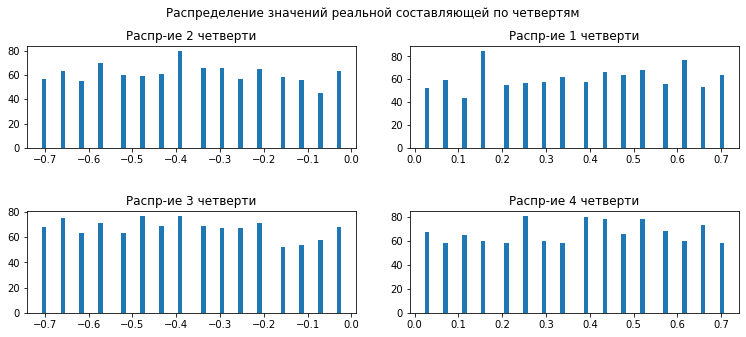

In [9]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений реальной составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.real, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.real, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.real, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.real, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

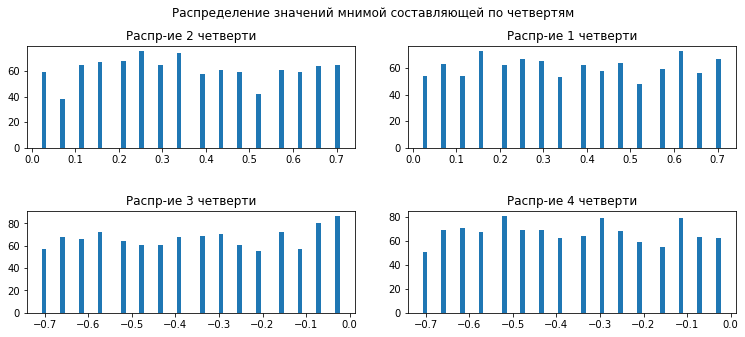

In [10]:
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений мнимой составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.imag, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.imag, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.imag, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.imag, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

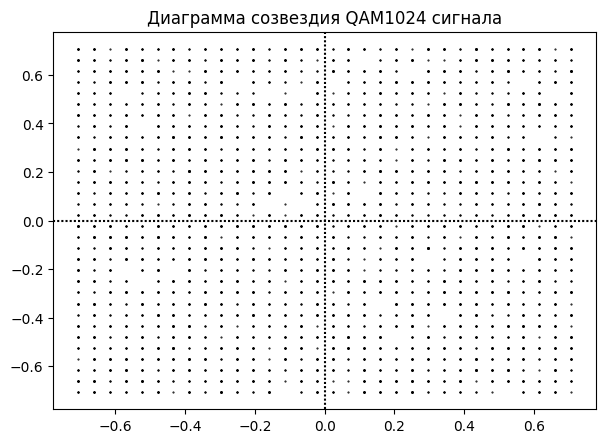

In [11]:
plt.figure(figsize=(7, 5), dpi=100)

plt.title(f"Диаграмма созвездия QAM{M} сигнала")
plt.scatter(QAM.real, 
            QAM.imag,
            c='black',
            marker='.',
            s=1)

plt.axhline(0, c='black', dashes=(1, 1))
plt.axvline(0, c='black', dashes=(1, 1))
plt.show()

Вернемся к QAM64 и проверим влияние таких параметров, как SNR и фазовый сдвиг на распределение составляющих сигнала

Для начала добавим шум и оценим распределение при SNR = 20

In [12]:
M = 64
N = 4096
SNR = 20
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))

# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
quarter_2 = np.array([i for i in QAM if i.real <= 0 and i.imag >= 0])
quarter_3 = np.array([i for i in QAM if i.real <= 0 and i.imag <= 0])
quarter_4 = np.array([i for i in QAM if i.real >= 0 and i.imag <= 0])

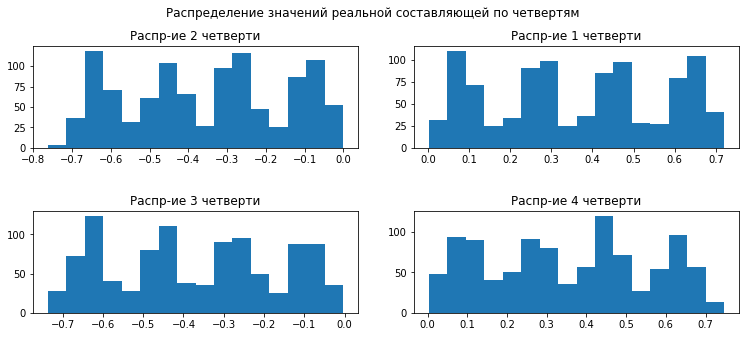

In [13]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений реальной составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.real, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.real, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.real, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.real, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

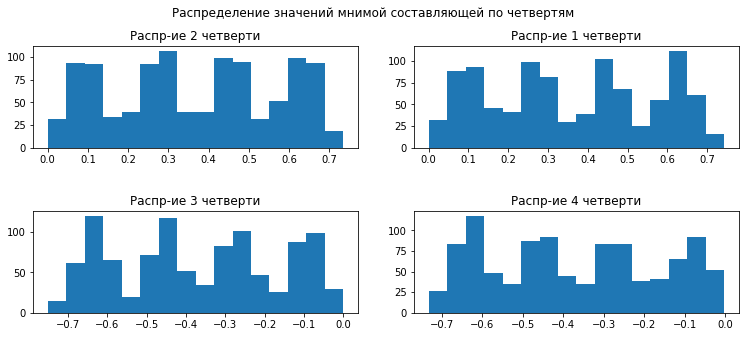

In [14]:
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений мнимой составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.imag, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.imag, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.imag, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.imag, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

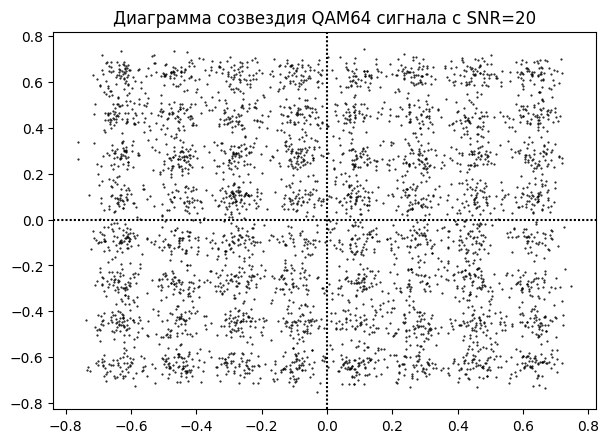

In [15]:
plt.figure(figsize=(7, 5), dpi=100)

plt.title(f"Диаграмма созвездия QAM{M} сигнала с SNR={SNR}")
plt.scatter(QAM.real, 
            QAM.imag,
            c='black',
            marker='.',
            s=1)

plt.axhline(0, c='black', dashes=(1, 1))
plt.axvline(0, c='black', dashes=(1, 1))
plt.show()

Как мы можем видеть при SNR = 20 существует возможность рассмотреть пики, но они выгладят уже не так явно, как при отсуствии шума

Теперь попробуем добавить фазовый сдвиг и посмотрим, как это отобразиться на диаграмме распределения

In [16]:
M = 64
N = 4096
SNR = 30
sh = 30
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
quarter_2 = np.array([i for i in QAM if i.real <= 0 and i.imag >= 0])
quarter_3 = np.array([i for i in QAM if i.real <= 0 and i.imag <= 0])
quarter_4 = np.array([i for i in QAM if i.real >= 0 and i.imag <= 0])

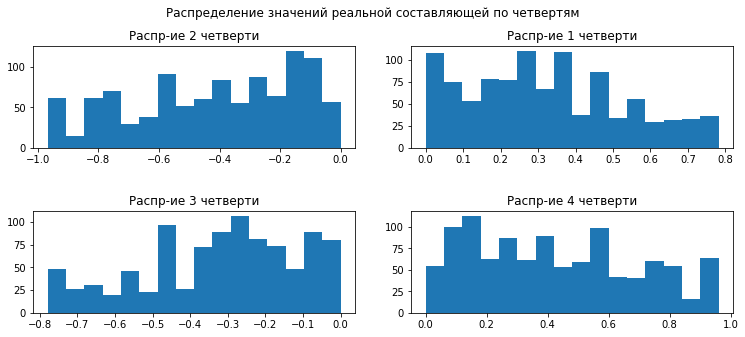

In [17]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений реальной составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.real, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.real, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.real, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.real, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

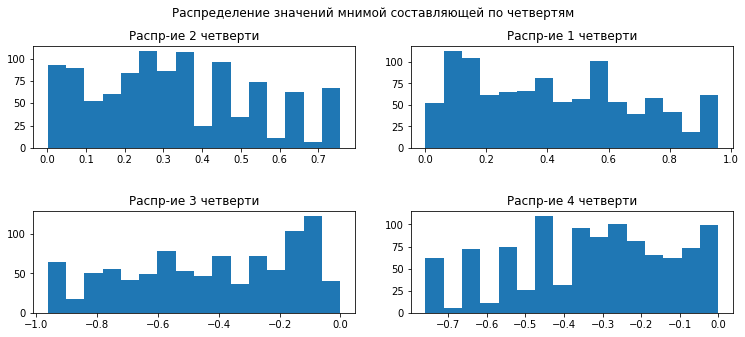

In [18]:
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений мнимой составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.imag, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.imag, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.imag, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.imag, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

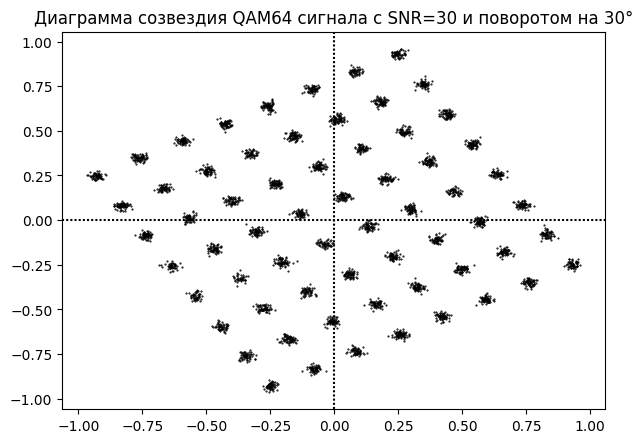

In [19]:
plt.figure(figsize=(7, 5), dpi=100)

plt.title(f"Диаграмма созвездия QAM{M} сигнала с SNR={SNR} и поворотом на {sh}°")
plt.scatter(QAM.real, 
            QAM.imag,
            c='black',
            marker='.',
            s=1)

plt.axhline(0, c='black', dashes=(1, 1))
plt.axvline(0, c='black', dashes=(1, 1))
plt.show()

Здесь мы можем увидеть, что алгоритм плохо адаптирован для созвездия с поворотом на несколько градусов, так как смещаются пики распределения составляющих сигнала

# Реализация алгоритма. Ядерная оценка плотности

Для того, чтобы реализовать данный алгоритм необходима функция или алгоритм, который позволит создать теоритическое распределение составляющих сигнала, оценка которого позволит определить пики распределения

В качестве данного функция подойдет ядерная оценка плотности определения.
Для того, чтобы ей воспользоваться необходимо импортировать из библиотеки `scipy.stats.kde ` функцию gaussian_kde, которая позволит провести ядерную оценку плотности и создать функцию, описывающую данное распределение

In [20]:
from scipy.stats.kde import gaussian_kde

Создадим QAM64 сигнал с хорошим соотношением сигнал/шум

In [21]:
M = 64
N = 4096
SNR = 30
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
quarter_2 = np.array([i for i in QAM if i.real <= 0 and i.imag >= 0])
quarter_3 = np.array([i for i in QAM if i.real <= 0 and i.imag <= 0])
quarter_4 = np.array([i for i in QAM if i.real >= 0 and i.imag <= 0])

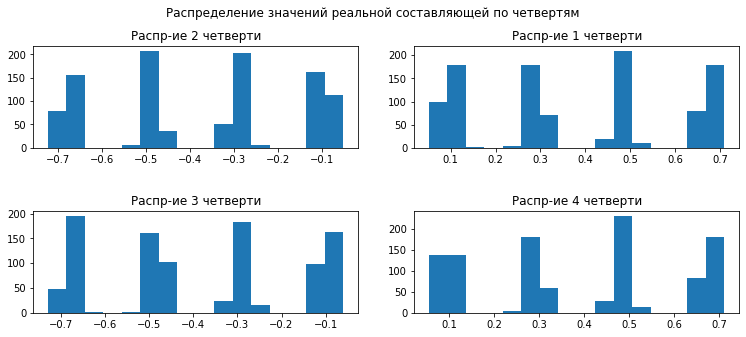

In [22]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений реальной составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.real, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.real, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.real, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.real, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

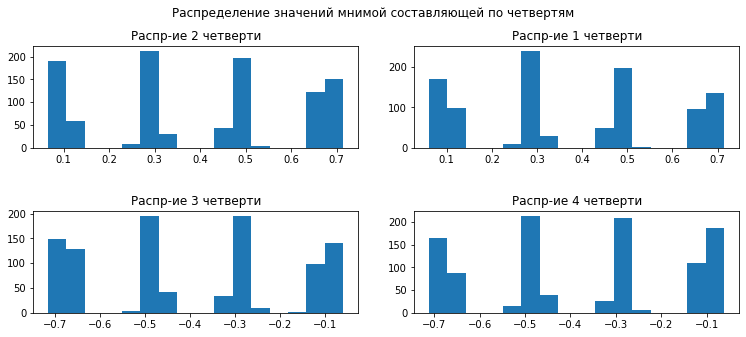

In [23]:
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений мнимой составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие 1 четверти')
ax1.hist(quarter_1.imag, bins=bins)

ax2.set_title('Распр-ие 2 четверти')
ax2.hist(quarter_2.imag, bins=bins)

ax3.set_title('Распр-ие 3 четверти')
ax3.hist(quarter_3.imag, bins=bins)

ax4.set_title('Распр-ие 4 четверти')
ax4.hist(quarter_4.imag, bins=bins)

fig.tight_layout(pad=3.0)
plt.show()

In [24]:
# Для каждой четверти и составляющей создадим свою функцию распределения
bw_method = 0.05 # Ширина ядра

density_1 = [gaussian_kde(quarter_1.real, bw_method = bw_method), 
             gaussian_kde(quarter_1.imag, bw_method = bw_method)]

density_2 = [gaussian_kde(quarter_2.real, bw_method = bw_method), 
             gaussian_kde(quarter_2.imag, bw_method = bw_method)]

density_3 = [gaussian_kde(quarter_3.real, bw_method = bw_method), 
             gaussian_kde(quarter_3.imag, bw_method = bw_method)]

density_4 = [gaussian_kde(quarter_4.real, bw_method = bw_method), 
             gaussian_kde(quarter_4.imag, bw_method = bw_method)]

Создадим массив который будет в себе хранить значения от 0 до 1 с определенным шагом, который зависит от количества разбиений в качестве кол-ва разбиений возьмем число символов модуляции, чтобы в точности отразить зависимость распределения

In [25]:
x = np.linspace(0, 1, N)

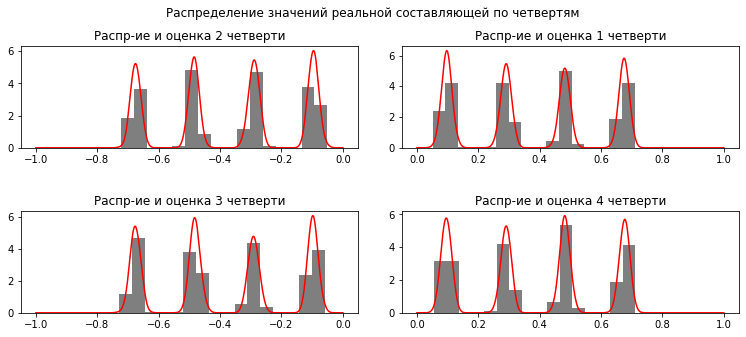

In [26]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Распределение значений реальной составляющей по четвертям')
fig.set_size_inches(11, 5)

ax1.set_title('Распр-ие и оценка 1 четверти')
ax1.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax1.plot(x, density_1[0](x), c='red')

ax2.set_title('Распр-ие и оценка 2 четверти')
ax2.hist(quarter_2.real, bins=bins, density=True, color='black', alpha=0.5)
ax2.plot(-x, density_2[0](-x), c='red')

ax3.set_title('Распр-ие и оценка 3 четверти')
ax3.hist(quarter_3.real, bins=bins, density=True, color='black', alpha=0.5)
ax3.plot(-x, density_3[0](-x), c='red')

ax4.set_title('Распр-ие и оценка 4 четверти')
ax4.hist(quarter_4.real, bins=bins, density=True, color='black', alpha=0.5)
ax4.plot(x, density_4[0](x), c='red')

fig.tight_layout(pad=3.0)
plt.show()

### Параметр bw_method (ширина ядра)

Посмотрм на то, как ширина ядра влияет на оценку распределения на примере QAM4
Для этого выберем в качестве ширины ядра следующие значения:
`[0.01, 0.1, 0.5, 1]`

In [27]:
M = 4
N = 4096
SNR = 10
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
bw_method = [0.01, 0.1, 0.5, 1] # Ширина ядра
density_1 = [gaussian_kde(quarter_1.real, bw_method = bw_method[0]), 
             gaussian_kde(quarter_1.real, bw_method = bw_method[1]),
             gaussian_kde(quarter_1.real, bw_method = bw_method[2]),
             gaussian_kde(quarter_1.real, bw_method = bw_method[3])]

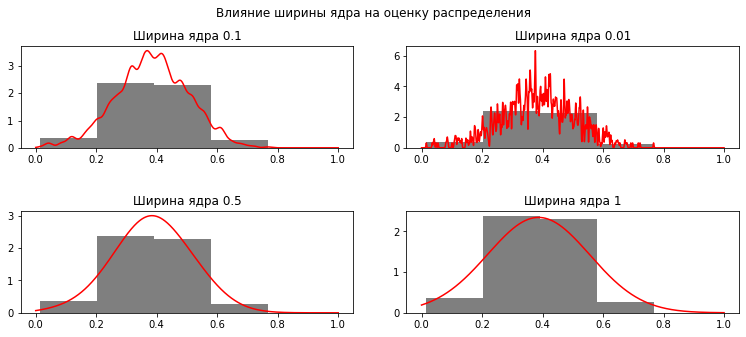

In [28]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Влияние ширины ядра на оценку распределения')
fig.set_size_inches(11, 5)

ax1.set_title(f'Ширина ядра {bw_method[0]}')
ax1.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax1.plot(x, density_1[0](x), c='red')

ax2.set_title(f'Ширина ядра {bw_method[1]}')
ax2.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax2.plot(x, density_1[1](x), c='red')

ax3.set_title(f'Ширина ядра {bw_method[2]}')
ax3.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax3.plot(x, density_1[2](x), c='red')

ax4.set_title(f'Ширина ядра {bw_method[3]}')
ax4.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax4.plot(x, density_1[3](x), c='red')

fig.tight_layout(pad=3.0)
plt.show()

Как мы видим, чем больше ширина ядра, тем больше сглаживание функции распределения.

В случае QAM4 лучше подходят более широкие ядра, так как они позволяют сгладить шумы и выявить пик, но в случае QAM1024 такое сглаживание может затруднить поиск пиков, так как они потреяются на фоне такого сильного сглаживания:

In [29]:
M = 1024
N = 4096
SNR = 40
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
bw_method = [0.01, 0.1, 0.5, 1] # Ширина ядра
density_1 = [gaussian_kde(quarter_1.real, bw_method = bw_method[0]), 
             gaussian_kde(quarter_1.real, bw_method = bw_method[1]),
             gaussian_kde(quarter_1.real, bw_method = bw_method[2]),
             gaussian_kde(quarter_1.real, bw_method = bw_method[3])]

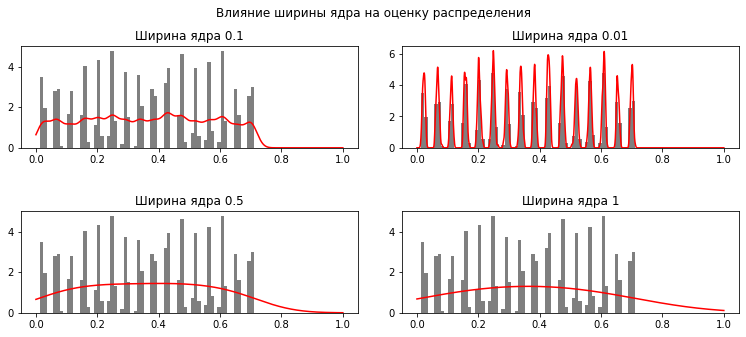

In [30]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Влияние ширины ядра на оценку распределения')
fig.set_size_inches(11, 5)

ax1.set_title(f'Ширина ядра {bw_method[0]}')
ax1.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax1.plot(x, density_1[0](x), c='red')

ax2.set_title(f'Ширина ядра {bw_method[1]}')
ax2.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax2.plot(x, density_1[1](x), c='red')

ax3.set_title(f'Ширина ядра {bw_method[2]}')
ax3.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax3.plot(x, density_1[2](x), c='red')

ax4.set_title(f'Ширина ядра {bw_method[3]}')
ax4.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax4.plot(x, density_1[3](x), c='red')

fig.tight_layout(pad=3.0)
plt.show()

Мы видим, что уже при ширине ядра более 0.1 функция сглаживается настолько, что становится трудным определить пики распределения

Следовательно для данного алгоритма, нужно подобрать параметры таким образом, чтобы они удовлетворяли 

### Использование децимации для упрощения функции распределения

Так как большие значения ширины ядра сглаживают функцию таким образом, что становится трудным определить пики в более выскоих уровнях модуляции, можно упростить (децимировать) функцию таким образом, чтобы она "не обращала внимание" на тонкости распределения

In [31]:
M = 4
N = 4096
SNR = 10
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])

density_1 = gaussian_kde(quarter_1.real, bw_method = 0.05)

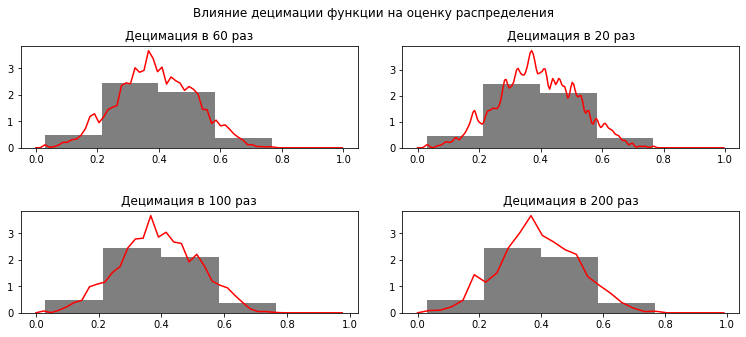

In [32]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Влияние децимации функции на оценку распределения')
fig.set_size_inches(11, 5)

ax1.set_title(f'Децимация в 20 раз')
ax1.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax1.plot(x[::20], density_1(x[::20]), c='red')

ax2.set_title(f'Децимация в 60 раз')
ax2.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax2.plot(x[::60], density_1(x[::60]), c='red')

ax3.set_title(f'Децимация в 100 раз')
ax3.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax3.plot(x[::100], density_1(x[::100]), c='red')

ax4.set_title(f'Децимация в 200 раз')
ax4.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax4.plot(x[::150], density_1(x[::150]), c='red')

fig.tight_layout(pad=3.0)
plt.show()

Посмотрим на результат децимации при QAM1024

In [33]:
M = 1024
N = 4096
SNR = 40
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])

density_1 = gaussian_kde(quarter_1.real, bw_method = 0.05)

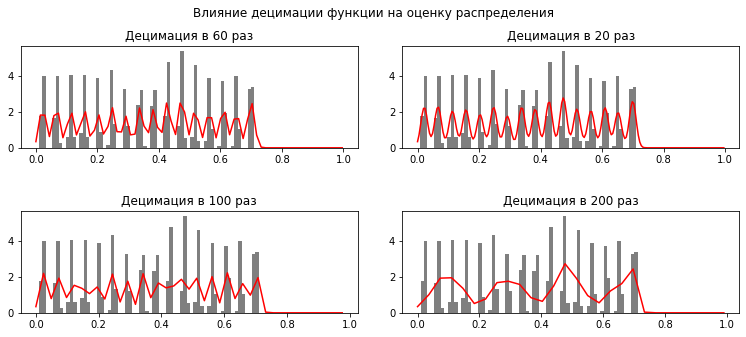

In [34]:
# Расчёт количества столбцов для корректного вывода
bins = int(((M/4)**(1/2))*4)
fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Влияние децимации функции на оценку распределения')
fig.set_size_inches(11, 5)

ax1.set_title(f'Децимация в 20 раз')
ax1.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax1.plot(x[::20], density_1(x[::20]), c='red')

ax2.set_title(f'Децимация в 60 раз')
ax2.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax2.plot(x[::60], density_1(x[::60]), c='red')

ax3.set_title(f'Децимация в 100 раз')
ax3.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax3.plot(x[::100], density_1(x[::100]), c='red')

ax4.set_title(f'Децимация в 200 раз')
ax4.hist(quarter_1.real, bins=bins, density=True, color='black', alpha=0.5)
ax4.plot(x[::150], density_1(x[::150]), c='red')

fig.tight_layout(pad=3.0)
plt.show()

Мы видим, что при децимации более чем в 100 раз распознавание пиков, становится затруднительным

# Реализация алгоритма. Использования алгоритма нахождения пиков

В качестве алгоритма нахождения пиков, можно использовать функцию `find_peaks`, которая содержится в библиотеке `scipy.signal`

Эта функция принимает одномерный массив и находит все локальные максимумы путем простого сравнения соседних значений. При желании можно выбрать подмножество этих пиков, указав условия для свойств пика.

Данная функция представляет большое кол-во параметров для настройки поиска пиков, подробнее можно узнать по следующей
[ссылке](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).

В нашем случае нас интересуют параметры:
- Минимальная дистанция между пиками
- Видимость пика


In [35]:
from scipy.signal import find_peaks

Продемонстрируем пример её работы на QAM4 сигнале

In [36]:
M = 4
N = 4096
SNR = 30
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))


# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])

density_1 = gaussian_kde(quarter_1.real, bw_method = 0.05)

x = np.linspace(0, 1, int((N**(1/2))*4)) # создание массива иксов с децимацией в 16 раз

In [37]:
# Создание массива со значениями функции яд. оценки
derivation = np.array(density_1(x))
# Нормировка значений функции ядерной оценки
derivation = derivation/max(derivation)
# Небольшое сглаживание с помощью окна - 4, фильтром скользящего среднего
derivation = pd.Series(derivation).rolling(window=4).mean().values
# Массив с Х-ми
x_values = np.array(x)
# минимальное расстояние между пиками
distance =  int((len(x)*0.707/16)/2) 

# prominence - параметр видимости пика
maxima = np.array(find_peaks(derivation, 
                             distance=distance, 
                             prominence=(0.08, 1)))

maxima = maxima[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [38]:
# Функция для округления полученного уровня модуляции к ближайшему
def return_closest(n):
  return min([4, 16, 64, 256, 1024], key=lambda x:abs(x-n))

In [39]:
answer = return_closest(len(maxima)*4*len(maxima))

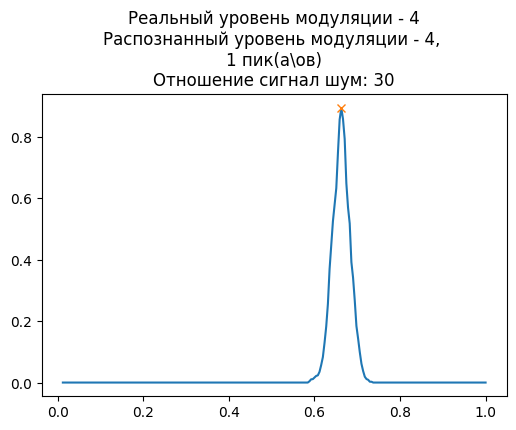

In [40]:
plt.figure(dpi=100)
plt.plot(x_values, derivation)
plt.plot(x_values[maxima], derivation[maxima], "x")
plt.title(f'''Реальный уровень модуляции - {M}
Распознанный уровень модуляции - {answer}, 
{len(maxima)} пик(а\ов)
Отношение сигнал шум: {SNR}''')
plt.show()

Повторим тоже самое для QAM1024

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


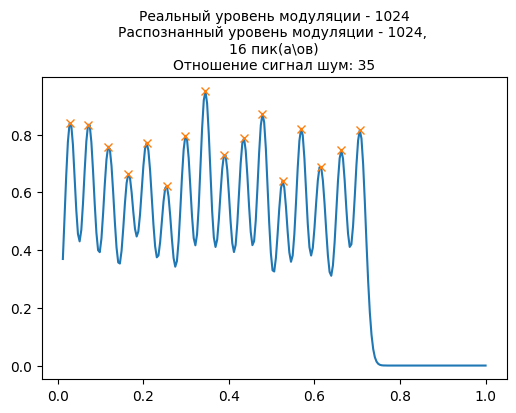

In [41]:
M = 1024
N = 4096
SNR = 35
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))
# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
density_1 = gaussian_kde(quarter_1.real, bw_method = 0.05)
x = np.linspace(0, 1, int((N**(1/2))*4)) # создание массива иксов с децимацией в 16 раз
# Создание массива со значениями функции яд. оценки
derivation = np.array(density_1(x))
# Нормировка значений функции ядерной оценки
derivation = derivation/max(derivation)
# Небольшое сглаживание с помощью окна - 4, фильтром скользящего среднего
derivation = pd.Series(derivation).rolling(window=4).mean().values
# Массив с Х-ми
x_values = np.array(x)
# минимальное расстояние между пиками
distance =  int((len(x)*0.707/16)/2) 
# prominence - параметр видимости пика
maxima = np.array(find_peaks(derivation, 
                             distance=distance, 
                             prominence=(0.08, 1)))
maxima = maxima[0]
answer = return_closest(len(maxima)*4*len(maxima))
plt.figure(dpi=100)
plt.plot(x_values, derivation)
plt.plot(x_values[maxima], derivation[maxima], "x")
plt.title(f'''Реальный уровень модуляции - {M}
Распознанный уровень модуляции - {answer}, 
{len(maxima)} пик(а\ов)
Отношение сигнал шум: {SNR}''',
          fontsize=10)
plt.show()

Алгоритм, отлично справляется с сигналами у которых соотношение  сигнал\шум более 30

Но при меньшем соотношение  сигнал шум, появляются проблемы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


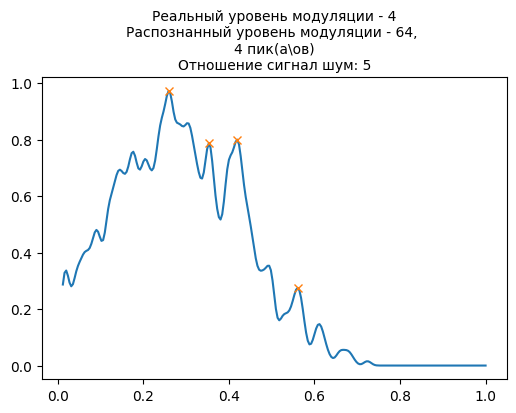

In [72]:
M = 4
N = 4096
SNR = 5
sh = 0
phase_shift = sh*np.pi/180 # Перевод градус в радианы
# Инициализация модулятора
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
# Создание поледовательности чисел
consq = np.random.randint(M, size=N)
# Модуляция
QAM = modulator.modulate(consq)
# Добавление фазового сдвига
QAM = QAM*np.exp(phase_shift*1j) # Добавление фазового сдвига
# Добавление шума
QAM = awgn(QAM, SNR)
# Нормировка
QAM = QAM/max(abs(QAM))
# Распределение значений по четвертям
quarter_1 = np.array([i for i in QAM if i.real >= 0 and i.imag >= 0])
density_1 = gaussian_kde(quarter_1.real, bw_method = 0.05)
x = np.linspace(0, 1, int((N**(1/2))*4)) # создание массива иксов с децимацией в 16 раз
# Создание массива со значениями функции яд. оценки
derivation = np.array(density_1(x))
# Нормировка значений функции ядерной оценки
derivation = derivation/max(derivation)
# Небольшое сглаживание с помощью окна - 4, фильтром скользящего среднего
derivation = pd.Series(derivation).rolling(window=4).mean().values
# Массив с Х-ми
x_values = np.array(x)
# минимальное расстояние между пиками
distance =  int((len(x)*0.707/16)/2) 
# prominence - параметр видимости пика
maxima = np.array(find_peaks(derivation, 
                             distance=distance, 
                             prominence=(0.08, 1)))
maxima = maxima[0]
answer = return_closest(len(maxima)*4*len(maxima))
plt.figure(dpi=100)
plt.plot(x_values, derivation)
plt.plot(x_values[maxima], derivation[maxima], "x")
plt.title(f'''Реальный уровень модуляции - {M}
Распознанный уровень модуляции - {answer}, 
{len(maxima)} пик(а\ов)
Отношение сигнал шум: {SNR}''',
          fontsize=10)
plt.show()

Данную проблему можно решить следующим образом:
- Настроить гиперпараметры `[bw_method, децимации, distance, prominence]`
- Усилить оценку за счет значений из всех 4-ех четвертей и составляющих

Если настройка очень тонкое дело, где изменение одного параметра влияет на улучшение распознавания более низких уровней модуляций, а изменение другого в точности, но наоборот, то усиление оценки за счет всех четвертей и составляющих дает значимый результат сразу для всех уровней модуляции

На практике это означает, что мы берем от всех значений составляющих модуль и тем самым переносим их в первую четверть

Воспользуемся прошлым сигналом и построим его созвездие в обычном состоянии и с переносом всех значений в первую четверть

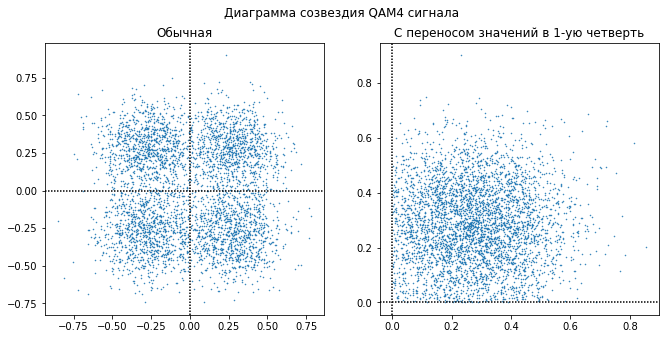

In [81]:
# Вывод диаграммы созвездия QAM4 сигнала
bins = int(((M/4)**(1/2))*4)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Диаграмма созвездия QAM4 сигнала')
fig.set_size_inches(11, 5)

ax1.set_title(f'Обычная')
ax1.scatter(QAM.real, 
            QAM.imag,
            marker='.',
            s=1)
ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

ax2.set_title(f'С переносом значений в 1-ую четверть')
ax2.scatter(abs(QAM.real), 
            abs(QAM.imag),
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
plt.show()

Посмотрим как это отразилось на оценки распределения

In [74]:
(np.concatenate((abs(QAM.real), abs(QAM.imag))))

array([0.04619737, 0.34733224, 0.14744909, ..., 0.2260472 , 0.47492177,
       0.32814306])

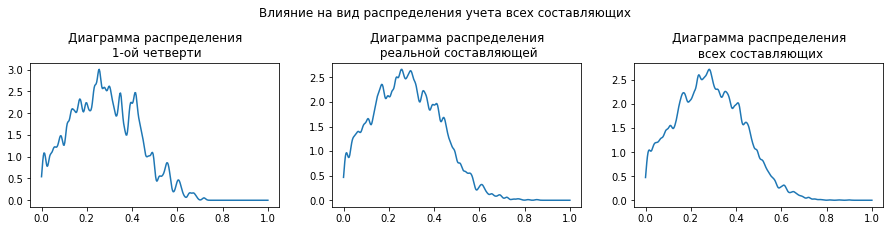

In [80]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3)
fig.suptitle('Влияние на вид распределения учета всех составляющих')
fig.set_size_inches(13, 3.5)

ax1.set_title(f'Диаграмма распределения\n 1-ой четверти')
ax1.plot(x, density_1(x))

ax2.set_title(f'Диаграмма распределения\n реальной составляющей')
density_2 = gaussian_kde(abs(QAM.real), bw_method = 0.05)
ax2.plot(x, density_2(x))

ax3.set_title(f'Диаграмма распределения\n всех составляющих')
all_QAM = (np.concatenate((abs(QAM.real), abs(QAM.imag))))
density_3 = gaussian_kde(all_QAM, bw_method = 0.05)
ax3.plot(x, density_3(x))
fig.tight_layout(pad=3.0)
plt.show()

Теперь воспользуемся полученной функцией распределения для определения кол-ва пиков

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


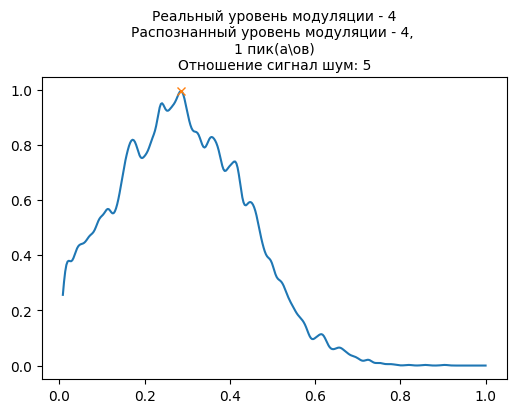

In [85]:
N = len(all_QAM)
x = np.linspace(0, 1, int((N**(1/2))*4)) # создание массива иксов с децимацией в 16 раз
# Создание массива со значениями функции яд. оценки
derivation = np.array(density_3(x))
# Нормировка значений функции ядерной оценки
derivation = derivation/max(derivation)
# Небольшое сглаживание с помощью окна - 4, фильтром скользящего среднего
derivation = pd.Series(derivation).rolling(window=4).mean().values
# Массив с Х-ми
x_values = np.array(x)
# минимальное расстояние между пиками
distance =  int((len(x)*0.707/16)/2) 
# prominence - параметр видимости пика
maxima = np.array(find_peaks(derivation, 
                             distance=distance, 
                             prominence=(0.08, 1.1)))
maxima = maxima[0]
answer = return_closest(len(maxima)*4*len(maxima))
plt.figure(dpi=100)
plt.plot(x_values, derivation)
plt.plot(x_values[maxima], derivation[maxima], "x")
plt.title(f'''Реальный уровень модуляции - {M}
Распознанный уровень модуляции - {answer}, 
{len(maxima)} пик(а\ов)
Отношение сигнал шум: {SNR}''',
          fontsize=10)
plt.show()